In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support

In [2]:
num_samples = 10000
num_classes = 2
weights = [0.95, 0.05]
num_features = 3
n_informative = 2
n_repeated = 0
n_redundant = 0
test_size_second_split = 0.90

In [3]:
seed = 202204

In [4]:
X, y = make_classification(
    n_samples=num_samples,
    n_classes=num_classes,
    weights=weights,
    n_features=num_features,
    n_informative=n_informative,
    n_redundant=n_redundant,
    n_repeated=n_repeated,
    random_state=seed,
)

c:\Nayef\ml-notes\.venv\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


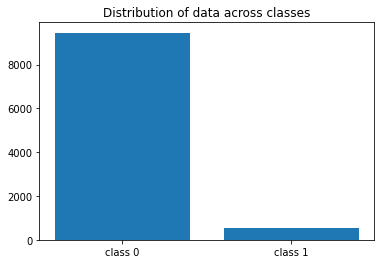

In [5]:
fig, ax = plt.subplots()
ax.bar(["class 0", "class 1"], pd.Series(y).value_counts().to_list())
ax.set_title("Distribution of data across classes")
fig.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, shuffle=True, random_state=seed
)

c:\Nayef\ml-notes\.venv\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


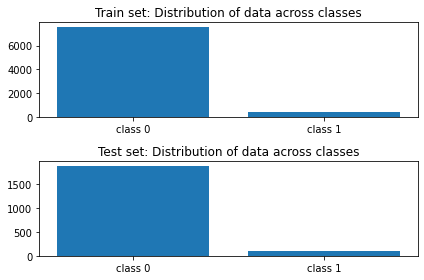

In [7]:
fig = plt.figure()
titles = [
    f"{dataset}: Distribution of data across classes"
    for dataset in ["Train set", "Test set"]
]
for i, target in enumerate([y_train, y_test]):
    ax = plt.subplot(2, 1, i + 1)
    ax.bar(["class 0", "class 1"], pd.Series(target).value_counts().to_list())
    ax.set_title(titles[i])
fig.tight_layout()
fig.show()

Datasets

In [8]:
X_train_simple_random_sample, _, y_train_simple_random_sample, _ = train_test_split(
    X_train, y_train, test_size=test_size_second_split, shuffle=True, random_state=seed
)

In [9]:
X_train_stratified_sample, _, y_train_stratified_sample, _ = train_test_split(
    X_train,
    y_train,
    test_size=test_size_second_split,
    stratify=y_train,
    shuffle=True,
    random_state=seed,
)

Model hyperparams

In [10]:
C = np.logspace(0, 4, 10)
penalty = ["l1", "l2"]
hyperparams = dict(C=C, penalty=penalty)

In [11]:
lr = LogisticRegression(solver="liblinear")

In [12]:
gridsearch = GridSearchCV(lr, hyperparams, cv=5, scoring="recall", verbose=0)

Case 1:<br>
grid-search CV on train_simple_random_sample, and evaluate on _test<br>
plot

c:\Nayef\ml-notes\.venv\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


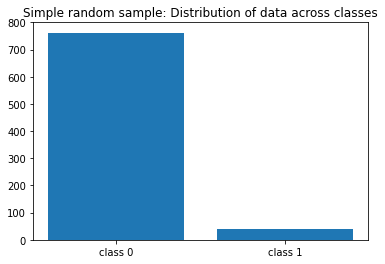

In [13]:
fig, ax = plt.subplots()
ax.bar(
    ["class 0", "class 1"],
    pd.Series(y_train_simple_random_sample).value_counts().to_list(),
)
ax.set_title("Simple random sample: Distribution of data across classes")
fig.show()

CV

In [14]:
best_model_01 = gridsearch.fit(
    X_train_simple_random_sample, y_train_simple_random_sample
)

In [15]:
best_penalty = best_model_01.best_estimator_.get_params()["penalty"]
best_C = best_model_01.best_estimator_.get_params()["C"]
best_acc_score = best_model_01.best_estimator_.score(
    X_train_simple_random_sample, y_train_simple_random_sample
)
best_acc_score_test = best_model_01.best_estimator_.score(X_test, y_test)

In [16]:
y_pred_01 = best_model_01.best_estimator_.predict(X_test)
best_results = precision_recall_fscore_support(y_test, y_pred_01, average="binary")

print(f'Simple random sampling: Best accuracy score on train data: {best_acc_score}')<br>
print(f'Simple random sampling: Best accuracy score on test data: {best_acc_score_test}')  # noqa<br>
print(f'Simple random sampling: Best accuracy precision, recall, f1: {best_results}')

Case 2:<br>
grid-search CV on train_simple_random_sample, and evaluate on _test<br>
plot

c:\Nayef\ml-notes\.venv\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


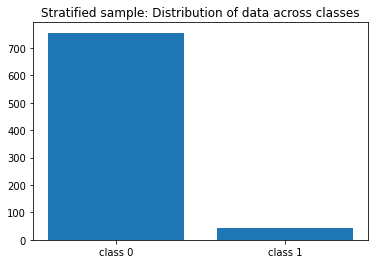

In [17]:
fig, ax = plt.subplots()
ax.bar(
    ["class 0", "class 1"],
    pd.Series(y_train_stratified_sample).value_counts().to_list(),
)
ax.set_title("Stratified sample: Distribution of data across classes")
fig.show()

CV

In [18]:
best_model_02 = gridsearch.fit(X_train_stratified_sample, y_train_stratified_sample)

In [19]:
best_penalty_02 = best_model_02.best_estimator_.get_params()["penalty"]
best_C_02 = best_model_02.best_estimator_.get_params()["C"]
best_acc_score_02 = best_model_02.best_estimator_.score(
    X_train_stratified_sample, y_train_stratified_sample
)
best_acc_score_test_02 = best_model_02.best_estimator_.score(X_test, y_test)

In [20]:
y_pred_02 = best_model_02.best_estimator_.predict(X_test)
best_results_02 = precision_recall_fscore_support(y_test, y_pred_02, average="binary")

# Summary

In [21]:
print(f"X.shape:       {X.shape}")
print(f"X_train.shape: {X_train.shape}")
print(f"X_train_simple_random_sample.shape: {X_train_simple_random_sample.shape}")
print(f"X_train_stratified_sample.shape:    {X_train_stratified_sample.shape}")

X.shape:       (10000, 3)
X_train.shape: (8000, 3)
X_train_simple_random_sample.shape: (800, 3)
X_train_stratified_sample.shape:    (800, 3)


print(f'Coefs from simple random sampling: {best_model_01.best_estimator_.coef_}')<br>
print(f'Coefs from stratified sampling:    {best_model_02.best_estimator_.coef_}')

In [22]:
print(f"Simple random sampling: Best accuracy score on train data: {best_acc_score}")
print(f"Simple random sampling: Best accuracy score on test data:{best_acc_score_test}")

Simple random sampling: Best accuracy score on train data: 0.97
Simple random sampling: Best accuracy score on test data:0.9675


In [23]:
print(f"Stratified sampling: Best accuracy score on train data:{best_acc_score_02}")
print(f"Stratified sampling: Best accuracy score on test data:{best_acc_score_test_02}")

Stratified sampling: Best accuracy score on train data:0.9725
Stratified sampling: Best accuracy score on test data:0.9685


In [24]:
print(f"Simple random sampling: Best precision, recall, f1: {best_results}")
print(f"Stratified sampling: Best precision, recall, f1:    {best_results_02}")

Simple random sampling: Best precision, recall, f1: (0.8928571428571429, 0.45871559633027525, 0.6060606060606061, None)
Stratified sampling: Best precision, recall, f1:    (0.9107142857142857, 0.46788990825688076, 0.6181818181818183, None)
